In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import ghosts

In [2]:
XMAX = .01
#Set for viewing the fine detail around the center of the histogram

#Redshift Differences
It is possible that ghosting during the BOSS survey caused some fibers to be given incorect values for their redshift based on ghost emission lines. This might cause the redshifts of the dim fibers to be very close to the redshift value for the bright fiber, or it may cause the two fibers adjacent to the bright fiber to be given nearly identical redshift values.
In order to determine if this is happenning, we would need to look at differences in redshift values and plot several histograms.

In [3]:
def find_redshift_diffs(file_name):
    """
    Return Z fifferences in adjacent and nearly adjacent fibers
    
    Args:
        file_name(str): name or path of file built from bossquery. Must have PLATE,FIBER,Z
    
    Retruns:
        plus1(np.ndarray): Z differences between adjacent fibers (same plate, fiber number diff of 1)
        plus2(np.ndarray):Z differences of fibers on same plate with fiber diff of 2
    """
    opened = False
    plus1 = []
    plus2 = []
    lines = []
    try:
        f = open(file_name)
        opened = True
        first = f.readline().split()
        z_i = first.index('Z')
        plate_i = first.index('PLATE')
        fiber_i = first.index('FIBER')
    except:
        print('FAILED')
    else:
        for line in f:
            lines.append(line.split())
##### Acquiring redshift data #####
        for i in range(len(lines)-1):
            if lines[i][plate_i] == lines[i+1][plate_i]:
                if int(lines[i][fiber_i]) == int(lines[i+1][fiber_i])-1:
                    diff = float(lines[i][z_i]) - float(lines[i+1][z_i])
                    plus1.append(diff)
                elif int(lines[i][fiber_i]) == int(lines[i+1][fiber_i])-2:
                    diff = float(lines[i][z_i]) - float(lines[i+1][z_i])
                    plus2.append(diff)
        for i in range(len(lines)-2):
            if lines[i][plate_i] == lines[i+2][plate_i]:
                if int(lines[i][fiber_i]) == int(lines[i+2][fiber_i])-2:
                    diff = float(lines[i][z_i]) - float(lines[i+2][z_i])
                    plus2.append(diff)
    finally:
        if opened:
            f.close()
    plus1 = np.array(plus1)
    plus2 = np.array(plus2)
    return plus1, plus2

In [4]:
info0_1, info0_2 = find_redshift_diffs('mjd0.dat')
# Redshift diffs for all objects

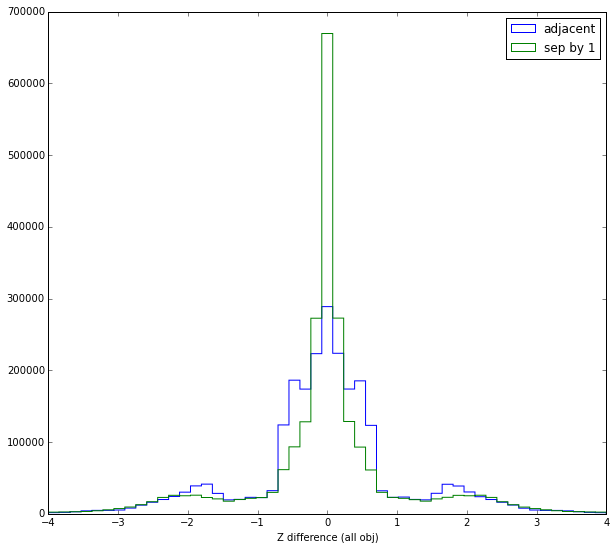

In [5]:
plt.figure(figsize = (10,9))
plt.hist(info0_1, histtype = 'step', bins = 51, range = (-4,4), label = 'adjacent')
plt.hist(info0_2, histtype = 'step', bins = 51, range = (-4,4), label = 'sep by 1')
plt.xlabel('Z difference (all obj)')
plt.legend()
plt.show()

Zooming in for close-up detail...

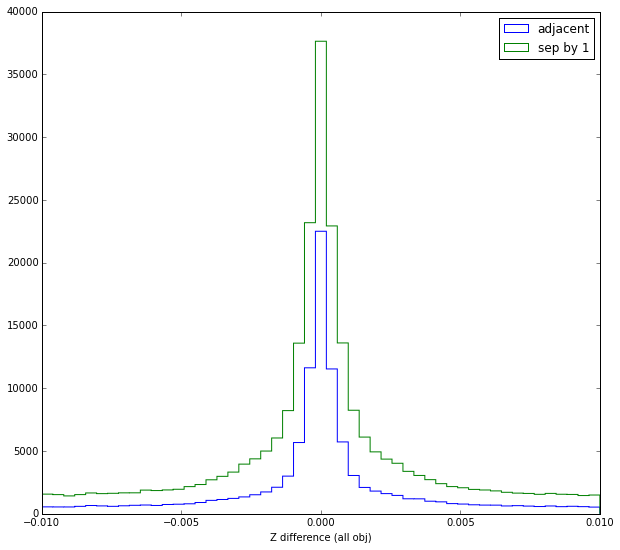

In [6]:
plt.figure(figsize = (10,9))
plt.hist(info0_1, histtype = 'step', bins = 51, range = (-XMAX,XMAX), label = 'adjacent')
plt.hist(info0_2, histtype = 'step', bins = 51, range = (-XMAX,XMAX), label = 'sep by 1')
plt.xlim(-XMAX,XMAX)
plt.xlabel('Z difference (all obj)')
plt.legend()
plt.show()

Quite a few of the BOSS targets were stars with very small redshifts. If we ignore these, it might give a better idea of how many objects have similar redshifts without being close enough to throw off the numbers.

In [7]:
info1_1, info1_2 = find_redshift_diffs('mjd1.dat')
#Redshift diffs for pairs where both objects have Z > 0.1

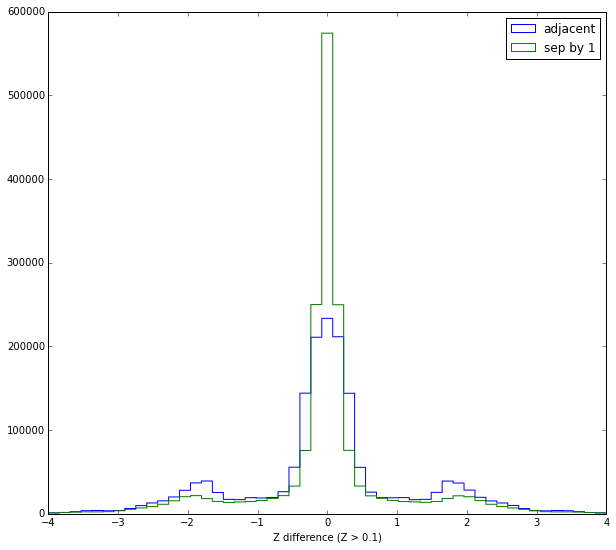

In [8]:
plt.figure(figsize = (10,9))
plt.hist(info1_1, histtype = 'step', bins = 51, range = (-4,4), label = 'adjacent')
plt.hist(info1_2, histtype = 'step', bins = 51, range = (-4,4), label = 'sep by 1')
plt.xlim(-4,4)
plt.xlabel('Z difference (Z > 0.1)')
plt.legend()
plt.show()

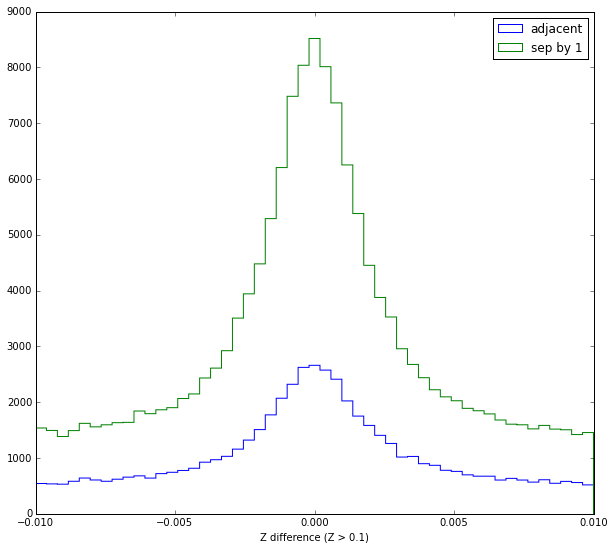

In [9]:
plt.figure(figsize = (10,9))
plt.hist(info1_1, histtype = 'step', bins = 51, range = (-XMAX,XMAX), label = 'adjacent')
plt.hist(info1_2, histtype = 'step', bins = 51, range = (-XMAX,XMAX), label = 'sep by 1')
plt.xlim(-XMAX,XMAX)
plt.xlabel('Z difference (Z > 0.1)')
plt.legend()
plt.show()

In [10]:
info5_1, info5_2 = find_redshift_diffs('mjd5.dat')
#Redshift diffs for pairs where both objects have Z>0.5

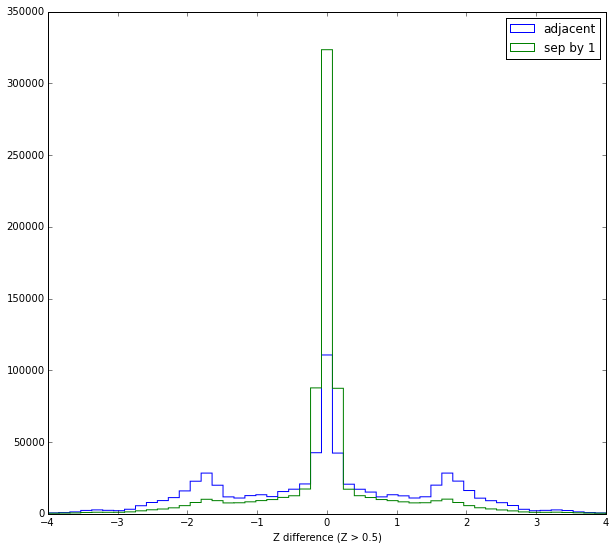

In [11]:
plt.figure(figsize = (10,9))
plt.hist(info5_1, histtype = 'step', bins = 51, range = (-4,4), label = 'adjacent')
plt.hist(info5_2, histtype = 'step', bins = 51, range = (-4,4), label = 'sep by 1')
plt.xlim(-4,4)
plt.xlabel('Z difference (Z > 0.5)')
plt.legend()
plt.show()

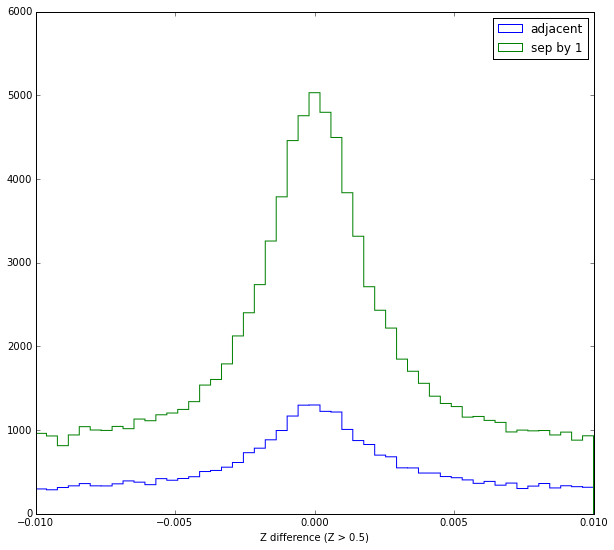

In [12]:
plt.figure(figsize = (10,9))
plt.hist(info5_1, histtype = 'step', bins = 51, range = (-XMAX,XMAX), label = 'adjacent')
plt.hist(info5_2, histtype = 'step', bins = 51, range = (-XMAX,XMAX), label = 'sep by 1')
plt.xlim(-XMAX,XMAX)
plt.xlabel('Z difference (Z > 0.5)')
plt.legend()
plt.show()

## Monte Carlo
In order to understand what part of objects with similar redshifts is random, and what might be due to ghosting, we need to look at the difference between random fibers.

In [13]:
def monte_carlo(file_name, n):
    """
    Return two randomly generated arrays of Z values from objects in file
    
    Args:
        file_name(str): name or path of file generated by bossquery. Must have Z column
        n(int): length of array to be made
    
    Returns:
        monte1(np.ndarray): array of randomly picked Z values from the given file
        monte2(np.ndarray): array of randomly picked Z values from the given file
    """
    opened = False
    lines = []
    try:
        f = open(file_name)
        opened = True
        first = f.readline().split()
        z_i = first.index('Z')
    except:
        print('FAILED')
    else:
##### Create a list of all Z values for objects in file #####
        for line in f:
            lines.append(float(line.split()[z_i]))
    finally:
        if opened:
            f.close()
##### Use the list of Z values as the base for the randomized drawing #####
    monte1 = np.random.choice(lines, size = n, replace = False)
    monte2 = np.random.choice(lines, size = n, replace = False)
    return monte1, monte2

In [14]:
a0_1, a0_2 = monte_carlo('mjd0.dat', 1000000)
#random selection of Z values from all objects
a1_1, a1_2 = monte_carlo('mjd1.dat', 1000000)
#random selection of Z values from all objects with Z > 0.1
a5_1, a5_2 = monte_carlo('mjd5.dat', 1000000)
#random selection of Z values from all objects with Z > 0.5

Plot the histogram of one of the monte carlo arrays just to see what the spread of the data looks like

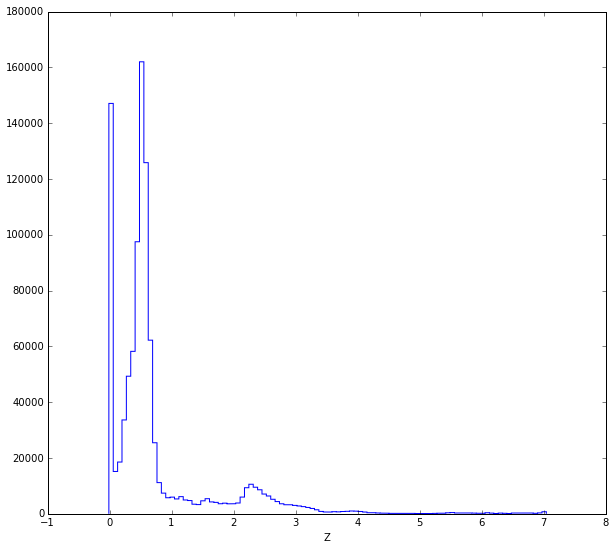

In [15]:
plt.figure(figsize = (10,9))
plt.hist(a0_1, histtype = 'step', bins = 100)
plt.xlabel('Z')
plt.show()

Subtracting the monte carlo arrays from eaach other gives an array of randomized Z differences.

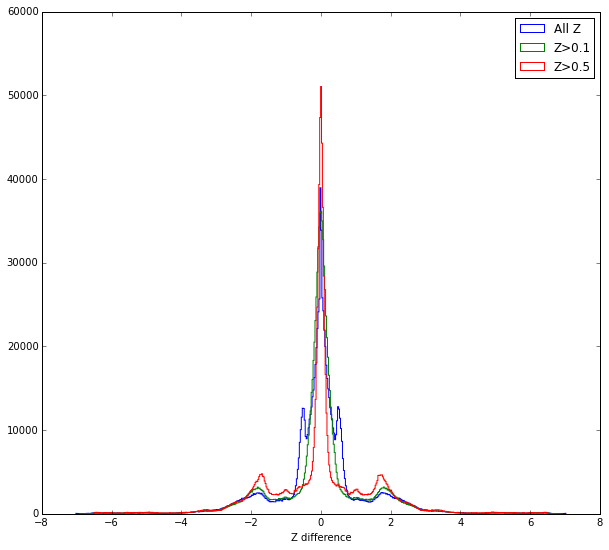

In [16]:
plt.figure(figsize = (10,9))
plt.hist(a0_1-a0_2, histtype = 'step', bins = 500, label = 'All Z')
plt.hist(a1_1-a1_2, histtype = 'step', bins = 500, label = 'Z>0.1')
plt.hist(a5_1-a5_2, histtype = 'step', bins = 500, label = 'Z>0.5')
plt.xlabel('Z difference')
plt.legend()
plt.show()

Plot histograms of the monte carlo difference array, adjacent fibers array, and nearly adjacent fibers array for Z > 0.1

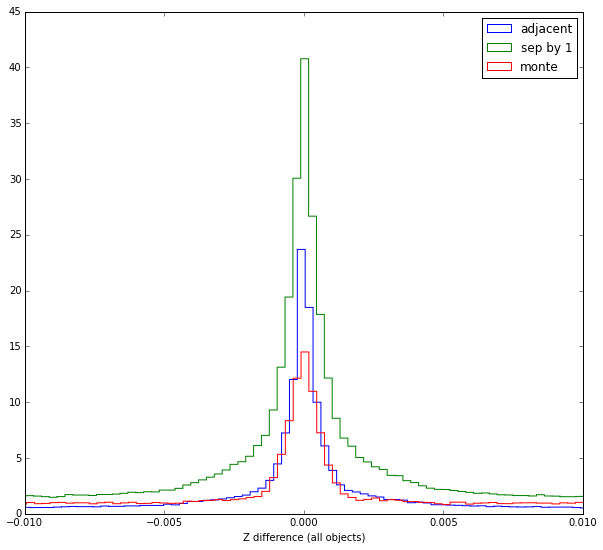

In [17]:
plt.figure(figsize = (10,9))
plt.hist(info0_1, histtype = 'step', bins = 50000, normed = True, label = 'adjacent')
plt.hist(info0_2, histtype = 'step', bins = 50000, normed = True, label = 'sep by 1')
plt.hist(a0_1-a0_2, histtype = 'step', bins = 50000, normed = True, label = 'monte')
plt.xlim(-XMAX,XMAX)
plt.xlabel('Z difference (all objects)')
plt.legend()
plt.show()

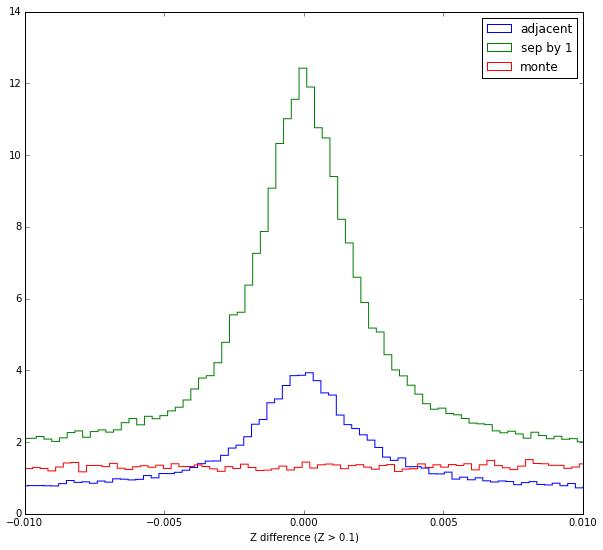

In [18]:
plt.figure(figsize = (10,9))
plt.hist(info1_1, histtype = 'step', bins = 50000, normed = True, label = 'adjacent')
plt.hist(info1_2, histtype = 'step', bins = 50000, normed = True, label = 'sep by 1')
plt.hist(a1_1-a1_2, histtype = 'step', bins = 50000, normed = True, label = 'monte')
plt.xlim(-XMAX,XMAX)
plt.xlabel('Z difference (Z > 0.1)')
plt.legend()
plt.show()